<a href="https://colab.research.google.com/github/MariiaZimokha/notebooks/blob/main/TF/tf_convertor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download Data

In [ ]:
file_path = "/content/drive/MyDrive/Studying/image classification.zip"
# file_path = "/content/drive/MyDrive/image classification.zip"
output_path = "/tmp/image_classification"

from zipfile import ZipFile

with ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall(output_path)

## Imports


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

## Utils

In [ ]:
# image size 150x150
def plot_img(dir):
  row_num = 4
  col_num = 4

  pics_names = os.listdir(dir)

  fig = plt.gcf()
  fig.set_size_inches(15, 20)

  pic_index = 8
  next_pic = [os.path.join(dir, fname) 
                  for fname in pics_names[pic_index-8:pic_index]]


  for i,img_path in enumerate(next_pic):
    sp = plt.subplot(row_num, col_num, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

In [ ]:
def plot_metrics(metric, val_metrics, epochs, name):
  plt.plot(epochs, metric, 'r', label=f'Training {name}')
  plt.plot(epochs, val_metrics, 'b', label=f'Validation {name}')
  plt.title(f'Training and validation {name}')
  plt.legend(loc=0)
  plt.figure()
  plt.show()

In [ ]:
train_dir = "/tmp/image_classification/seg_train/seg_train"
test_dir = "/tmp/image_classification/seg_test/seg_test"


## Data preprocessing

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode="rgb",
    class_mode="categorical"
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
class_names = train_generator.class_indices
print(class_names)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


## Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(6, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=45,
    validation_data=test_generator,
    verbose=2
)

Epoch 1/45
439/439 - 114s - loss: 1.1951 - accuracy: 0.5154 - val_loss: 0.9067 - val_accuracy: 0.6557 - 114s/epoch - 261ms/step
Epoch 2/45
439/439 - 100s - loss: 0.9952 - accuracy: 0.6107 - val_loss: 0.7660 - val_accuracy: 0.7163 - 100s/epoch - 228ms/step
Epoch 3/45
439/439 - 100s - loss: 0.8788 - accuracy: 0.6674 - val_loss: 0.6548 - val_accuracy: 0.7637 - 100s/epoch - 228ms/step
Epoch 4/45
439/439 - 101s - loss: 0.8140 - accuracy: 0.6968 - val_loss: 0.7577 - val_accuracy: 0.7160 - 101s/epoch - 231ms/step
Epoch 5/45
439/439 - 107s - loss: 0.7602 - accuracy: 0.7207 - val_loss: 0.5927 - val_accuracy: 0.7957 - 107s/epoch - 244ms/step
Epoch 6/45
439/439 - 100s - loss: 0.7239 - accuracy: 0.7349 - val_loss: 0.5513 - val_accuracy: 0.7973 - 100s/epoch - 229ms/step
Epoch 7/45
439/439 - 101s - loss: 0.6956 - accuracy: 0.7466 - val_loss: 0.5537 - val_accuracy: 0.8093 - 101s/epoch - 231ms/step
Epoch 8/45
439/439 - 101s - loss: 0.6569 - accuracy: 0.7603 - val_loss: 0.5282 - val_accuracy: 0.8077 - 

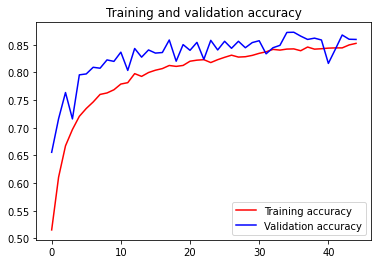

<Figure size 432x288 with 0 Axes>

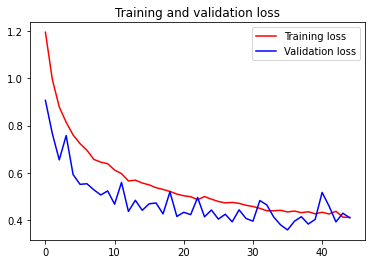

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plot_metrics(acc, val_acc, epochs, "accuracy")
plot_metrics(loss, val_loss, epochs, "loss")

######Test prediction

In [ ]:
class_names = train_generator.class_indices
print(class_names)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


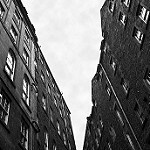

In [ ]:
pred_path = "/tmp/image_classification/seg_pred/seg_pred"
import PIL

all_pred_data = os.listdir("/tmp/image_classification/seg_pred/seg_pred")

PIL.Image.open(f"{pred_path}/{all_pred_data[45]}")

In [ ]:
import PIL
import numpy as np


def image_processing(image_path):
  image = PIL.Image.open(image_path)
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = tf.image.resize_with_pad(image, target_height=150, target_width=150)
  image = np.expand_dims(image, axis=0)
  # image = tf.image.resize(image, (150, 150))
  print(image.shape)
  return image

In [ ]:
import numpy as np

from tensorflow.keras.preprocessing import image

image_path = f"{pred_path}/{all_pred_data[45]}"

image = image_processing(image_path)

# image = tf.image.rgb_to_grayscale(image)
# image = tf.image.grayscale_to_rgb(image)
# image = tf.reshape(image_path, (1, 150, 150, 3))

#  tensorflow transferl learning
# img_array = tf.keras.utils.img_to_array(image)
# img = image.load_img(image_path, target_size=(150, 150))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# preds = model.predict(x)
# # decode the results into a list of tuples (class, description, probability)
# # (one such list for each sample in the batch)
# print('Predicted:', preds)

predictions = model.predict(image)
print('predictions ', predictions)
score = tf.nn.softmax(predictions[0])
# print('predictions ', np.argmax(preds))


print('score ', score)
print('class_names ', class_names)
# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

(1, 150, 150, 3)
predictions  [[1. 0. 0. 0. 0. 0.]]
score  tf.Tensor([0.35218745 0.12956253 0.12956253 0.12956253 0.12956253 0.12956253], shape=(6,), dtype=float32)
class_names  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


####Save model

In [ ]:
model.save("/content/drive/MyDrive/Studying/cnn.h5")

## Load model

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Studying/cnn.h5')

In [ ]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f1fde5ae390>>

## TfLite

### Convert and save

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('/content/drive/MyDrive/Studying/cnn.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp7zdc244e/assets


### Load model

In [ ]:
import numpy as np

class Model():
  def __init__(self, model) -> None:
      self.model = model
      self.model.allocate_tensors()
      self.input_details = model.get_input_details()
      self.output_details = model.get_output_details()

  def tflite_predict(self, input_data):
    self.model.set_tensor(self.input_details[0]['index'], input_data)

    self.model.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = self.model.get_tensor(self.output_details[0]['index'])
    return output_data


In [ ]:
# https://www.tensorflow.org/lite/guide/inference#load_and_run_a_model_in_python

# Load the TFLite model and allocate tensors.
model_tflite = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Studying/cnn.tflite")
# interpreter.allocate_tensors()

model = Model(model_tflite)


### Test prediction

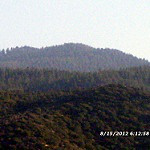

In [ ]:
pred_path = "/tmp/image_classification/seg_pred/seg_pred"
import PIL

all_pred_data = os.listdir("/tmp/image_classification/seg_pred/seg_pred")

PIL.Image.open(f"{pred_path}/{all_pred_data[2]}")

In [ ]:
import numpy as np

from tensorflow.keras.preprocessing import image

image_path = f"{pred_path}/{all_pred_data[2]}"

image = image_processing(image_path)

result = model.tflite_predict(image)
print(result)
score = tf.nn.softmax(result[0])
# print('predictions ', np.argmax(preds))


print('score ', score)
print('class_names ', class_names)

(1, 150, 150, 3)
[[0. 0. 0. 0. 0. 1.]]
score  tf.Tensor([0.12956251 0.12956251 0.12956251 0.12956251 0.12956251 0.35218742], shape=(6,), dtype=float32)
class_names  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
